# **TOOLBOX GRUPO CALIFORNIA**  

### **Integrantes:**  
- **Rommel Lopez**  
- **Jose Luis Padilla**  
- **Rodrigo Álvarez**  
- **Toni Santacruz**  
- **Guillermo Castillón**  

## Importación

In [156]:
# Importar toolbox
import ToolBox_Californiano as tb
import pandas as pd
import numpy as np

In [157]:
from importlib import reload
reload(tb)
dir(tb)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'clasifica_variables',
 'describe_df',
 'f_oneway',
 'get_features_cat_regression',
 'get_features_num_regression',
 'np',
 'pd',
 'pearsonr',
 'plot_features_cat_regression',
 'plot_features_num_regression',
 'plt',
 'sns']

## Introducción

Este notebook contiene un ejemplo de uso de un set de herramientas, el objetivo de dicho set es tratar las variables de un dataset, ayudando a la seleccion de features para un posterior modelado de machine learning supervisado. Estas funciones permiten analizar tanto variables numéricas como categóricas en relación con una variable objetivo.

Para este ejemplo utlizaremos un dataframe que da informacion sobre el consumo, ingreso, duracion, distancia y tipologia de los vuelos de distintas compañias aereas durante el mes de junio de 2023

In [158]:
#Importar dataframe
df = pd.read_csv('../data/dataset_viajes_jun23.csv')
df.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


### 1. **`describe_df(dataframe)`**  
   - Proporciona un resumen del DataFrame con información clave como el tipo de dato, valores nulos, valores únicos y cardinalidad.

In [159]:
tb.describe_df(df)

COL_N,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
DATA_TYPE,object,object,object,int64,object,bool,float64,int64,float64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,5,11,11,45,4,2,501,113,600,347,1
CARDIN (%),0.01,0.02,0.02,0.08,0.01,0.0,0.84,0.19,1.0,0.58,0.0


### 2. **`clasifica_variables(df, umbral_categoria, umbral_continua)`**  
   - Clasifica las variables en Binaria, Categórica, Numérica Continua o Numérica Discreta en función de los umbrales de cardinalidad especificados.
   - Incluye dos categorias extra dedicadas a tipos de columna de escasa o ninguna utilidad para el analisis: Categoricas de excesiva cardinalidad y constantes.

In [160]:
tb.clasifica_variables(df,20,0.05)

,nombre_variable,tipo_sugerido
0,aircompany,Categórica
1,origen,Categórica
2,destino,Categórica
3,distancia,Numérica Continua
4,avion,Categórica
5,con_escala,Binaria
6,consumo_kg,Numérica Continua
7,duracion,Numérica Continua
8,ingresos,Numérica Continua
9,id_vuelo,Categórica de excesiva cardinalidad


## **Especificidades sobre la funcionalidad de las funciones de selección y visualización**

- Las funciones de **selección de características** como `get_features_num_regression` y `get_features_cat_regression` utilizan internamente la función `clasifica_variables` para identificar automáticamente las variables adecuadas según su tipo (numéricas o categóricas).

- Las funciones de **visualización** como `plot_features_num_regression` y `plot_features_cat_regression` permiten especificar las columnas para graficar a través del argumento `columns`

In [161]:
# Establecemos Columna Target y listas de numericas y categoricas para las funciones de visualización.
target= "ingresos"
df_clasificacion=tb.clasifica_variables(df.drop(columns=target),20,0.05)
numericas = df_clasificacion[(df_clasificacion["tipo_sugerido"]=="Numérica Continua") | (df_clasificacion["tipo_sugerido"]=="Numérica Discreta")]["nombre_variable"].to_list()
categoricas = df_clasificacion[(df_clasificacion["tipo_sugerido"]=="Categórica") | (df_clasificacion["tipo_sugerido"]=="Binaria")]["nombre_variable"].to_list()
print(numericas)
print(categoricas)

['distancia', 'consumo_kg', 'duracion']
['aircompany', 'origen', 'destino', 'avion', 'con_escala']


### 3. **`get_features_num_regression(dataframe, target_col, umbral_corr, pvalue=None, umbral_cat=20)`**  
   - Identifica las variables numéricas significativamente correlacionadas con la variable objetivo basandose en un umbral de correlación y opcionalmente en un test de hipótesis.

In [162]:
tb.get_features_num_regression(df,target,0.1,0.05)

La correlacion entre las columnas numericas y el target debe superar: 0.1
---------------------------------------------------------------------------
<distancia> corr con target: 0.9288326149230471
<consumo_kg> corr con target: 0.9448752510115354
<duracion> corr con target: 0.8675145069113249

¿Es la correlacion estadisticamente significativa?
---------------------------------------------------------------------------
<distancia>: p_value = 4.791204624235064e-260  Si
<consumo_kg>: p_value = 3.7950771955435423e-292  Si
<duracion>: p_value = 1.626126699305076e-183  Si


['distancia', 'consumo_kg', 'duracion']

### 4. **`plot_features_num_regression(dataframe, target_col, columns=[], umbral_corr=0, pvalue=None)`**   
   - Genera pares de gráficos de dispersión y distribuciones para visualizar la relación entre la variable objetivo y las variables numéricas seleccionadas.

Columna: distancia, p-value: 4.791204624235064e-260
Columna: consumo_kg, p-value: 3.7950771955435423e-292
Columna: duracion, p-value: 1.626126699305076e-183


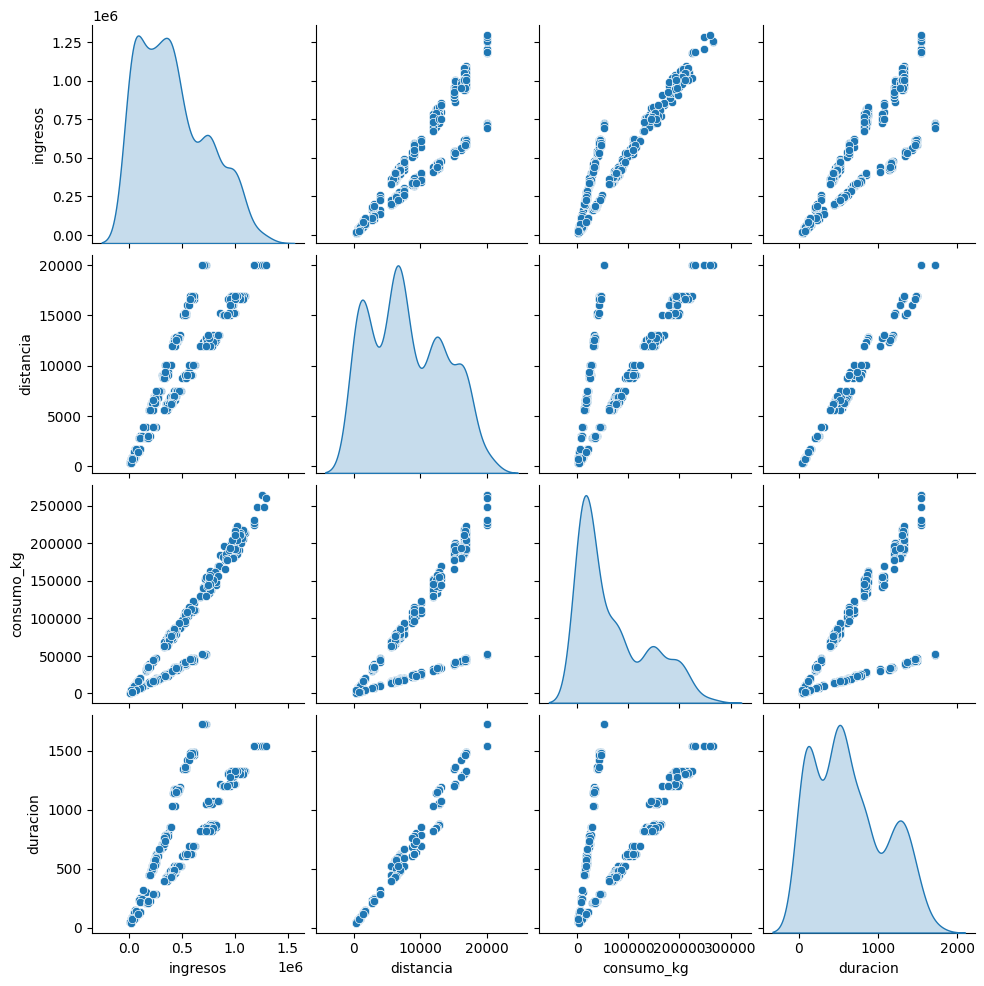

['distancia', 'consumo_kg', 'duracion']

In [163]:
tb.plot_features_num_regression(df,target,numericas,0.05,0.05)

### 5. **`get_features_cat_regression(dataframe, target_col, pvalue=0.05)`**   
   - Determina qué variables categóricas tienen una relación significativa con la variable objetivo utilizando pruebas estadisticas

In [164]:
tb.get_features_cat_regression(df,target,0.05)

['aircompany', 'origen', 'destino', 'avion', 'con_escala']

### 6. **`plot_features_cat_regression(dataframe, target_col, columns=[], pvalue=0.05, with_individual_plot=False)`**   
   - Genera histogramas de la variable objetivo según las variables categóricas significativas, permitiendo agruparlas o visualizarlas individualmente.

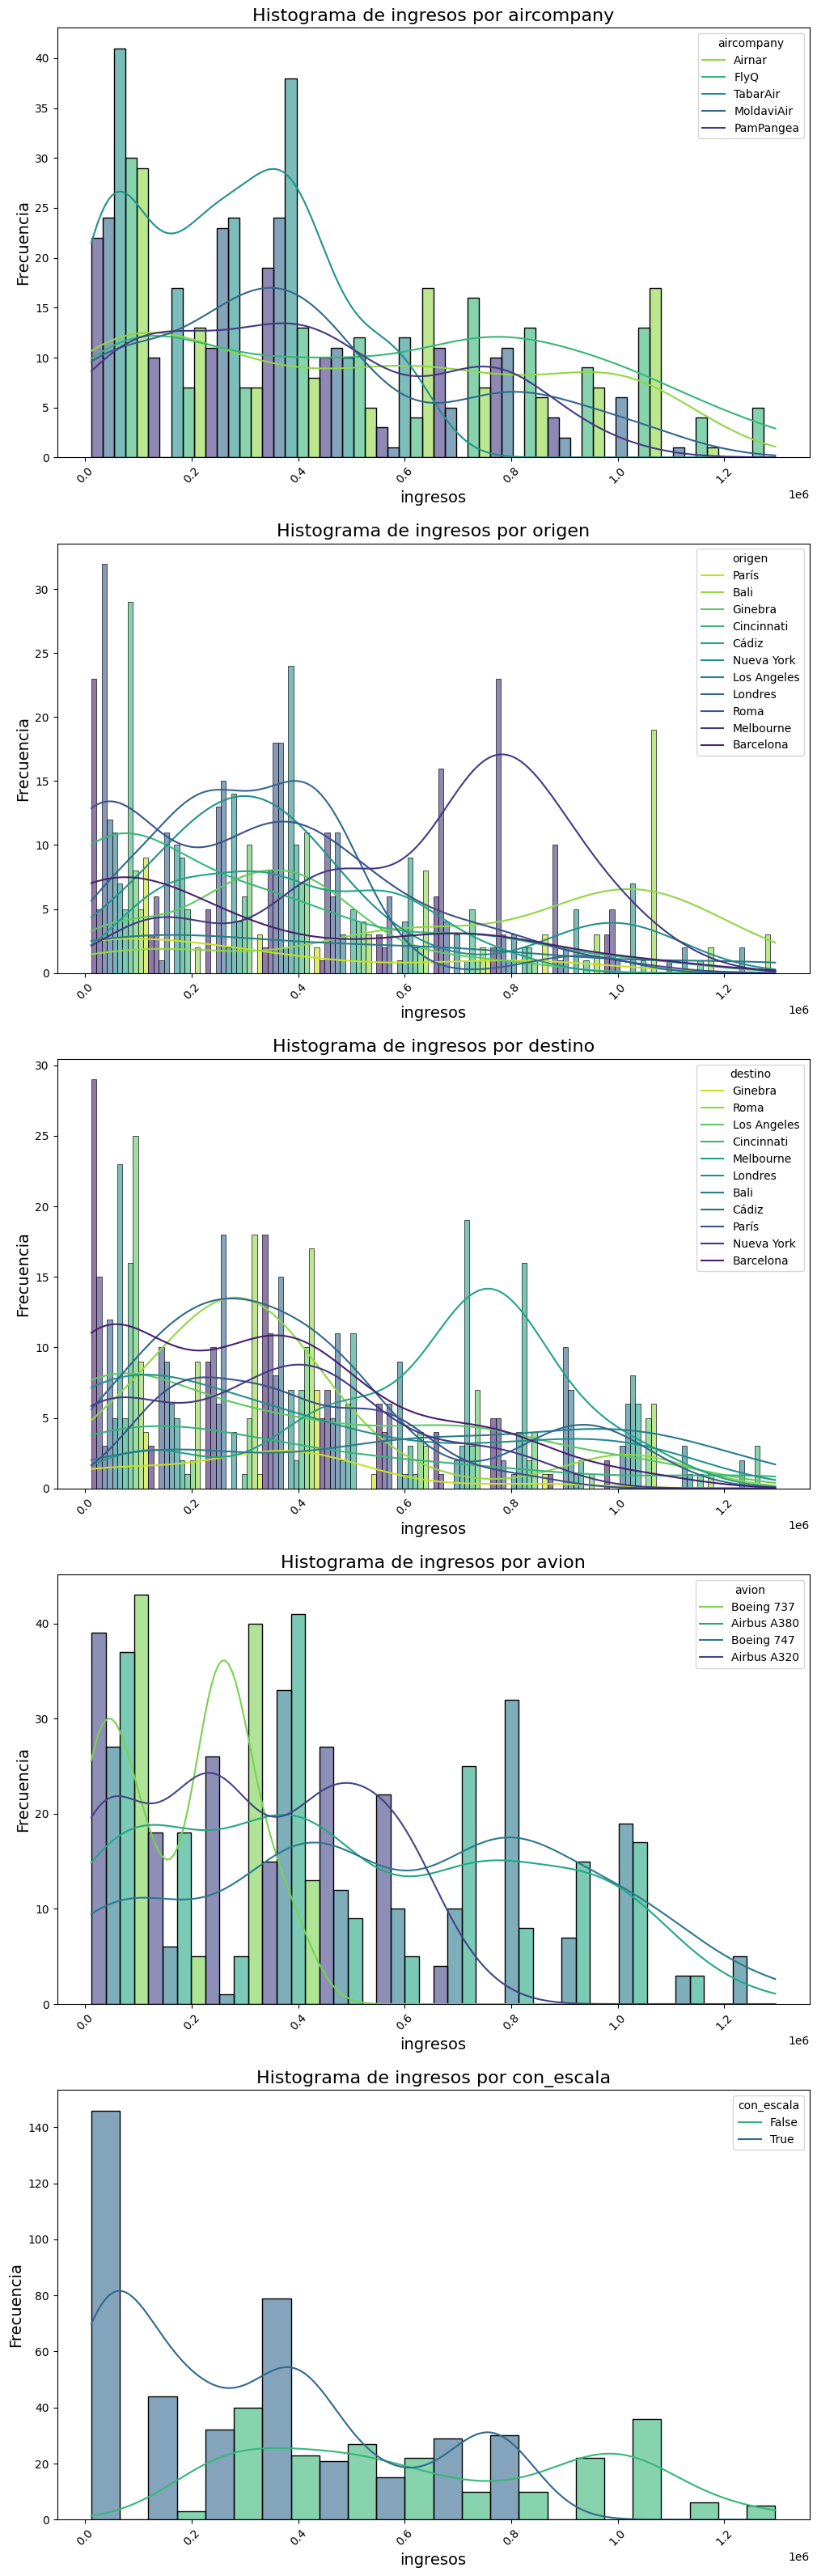

['aircompany', 'origen', 'destino', 'avion', 'con_escala']

In [165]:
tb.plot_features_cat_regression(df,target,categoricas,0.05,False)